In [1]:
# -*- coding: UTF-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
import pymc3 as pm
import arviz as az

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35 ## unknown value in a real experiment
data = scipy.stats.bernoulli.rvs(p=theta_real, size=trials)

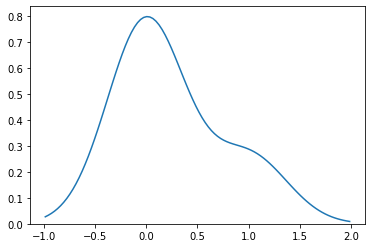

In [3]:
sns.kdeplot(data)

In [4]:
with pm.Model() as our_first_model:
    Θ = pm.Beta('Θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=Θ, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Θ]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:09<00:00, 326.36draws/s]


C:\Users\larry.jones\Miniconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\larry.jones\Miniconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022387ED3E48>,
      dtype=object)

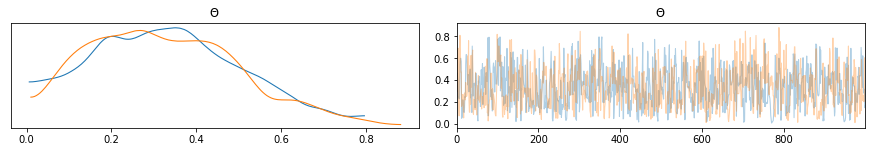

In [5]:
az.plot_trace(trace)

In [6]:
summary = az.summary(trace)
summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Θ,0.333,0.176,0.02,0.635,0.006,0.004,851.0,851.0,816.0,834.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022387B487C8>],
      dtype=object)

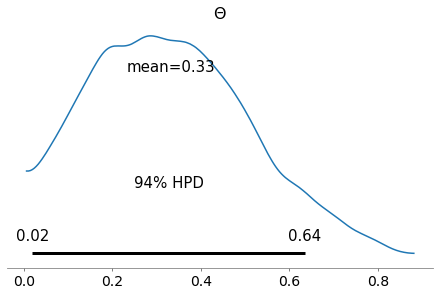

In [7]:
az.plot_posterior(trace)

In [ ]:
az.plot_posterior(trace, rope=(0.45, 0.55))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002238A00E688>],
      dtype=object)

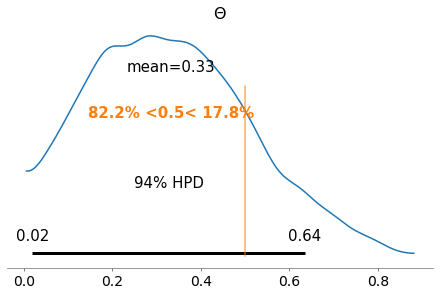

In [9]:
az.plot_posterior(trace, ref_val=0.5)
